In [36]:
import numpy as np
import matplotlib.pyplot as plt

### Pandas
[10 minutes to Pandas, całkiem fajny przegląd](http://pandas.pydata.org/pandas-docs/stable/10min.html)

In [2]:
import pandas as pd
pd?

In [85]:
np.random.seed(1)
df = pd.DataFrame(np.random.random((30, 5)),
            columns=['a', 'b', 'c', 'd', 'długa nazwa'])
df
df[df > 0.5]
df.cumsum()
df.describe()
df2 = pd.DataFrame(np.ones(30), columns=['d'])
df2.add(df, fill_value=0)

,a,b,c,d,długa nazwa
0,0.417022,0.720324,0.000114,1.302333,0.146756
1,0.092339,0.186260,0.345561,1.396767,0.538817
2,0.419195,0.685220,0.204452,1.878117,0.027388
3,0.670468,0.417305,0.558690,1.140387,0.198101
4,0.800745,0.968262,0.313424,1.692323,0.876389
5,0.894607,0.085044,0.039055,1.169830,0.878143
6,0.098347,0.421108,0.957890,1.533165,0.691877
7,0.315516,0.686501,0.834626,1.018288,0.750144
8,0.988861,0.748166,0.280444,1.789279,0.103226
9,0.447894,0.908596,0.293614,1.287775,0.130029


### Sympy
[Dobry wstępowy tutorial](http://docs.sympy.org/latest/tutorial/preliminaries.html#about-this-tutorial)

In [2]:
import sympy as sp
sp.init_printing()

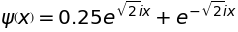

In [40]:
hbar, E, m, x = sp.symbols('hbar, E, m, x')
psi = sp.Function('psi')
psi(x)
eq = sp.Eq(E*psi(x), -hbar**2/2/m * psi(x).diff(x,2))
solution = sp.dsolve(eq)

#na tym utknęliśmy
podstawienia = solution.subs({hbar: 1, E: 1, m: 1, 'C1': 1, 'C2':0.25})
podstawienia
# to na tym etapie jest obiekt typu equation - składa się z dwóch "expression" i znaku = między nimi
# żeby go policzyc numerycznie musimy wyciągnąć prawą stronę

In [32]:
podstawienia.rhs #right hand side

In [42]:
funkcja = sp.lambdify(x, podstawienia.rhs, 'numpy')
x_plot = np.linspace(-3, 3, 100)
y_plot = funkcja(x_plot)
plt.plot(x_plot, y_plot.real, x_plot, y_plot.imag) #część urojona i rzeczywista
plt.show()

### Numba

In [46]:
import numba
A = [koczkodan**2 for koczkodan in range(10000)]
B = [x**3 for x in range(10000)]

A_np = np.array(A)
B_np = np.array(B)

wynik = np.zeros(10000)
@numba.jit()
def add_list(A, B):
    for i in range(10000):
        wynik[i] = A[i] + B[i]

@numba.jit()
def add_numpy(A, B):
    return A + B

def add_numpy_nonjit(A, B):
    return A + B

In [49]:
%%timeit
add_numpy(A_np, B_np)

The slowest run took 5.02 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.8 µs per loop


In [50]:
%%timeit
add_numpy_nonjit(A_np, B_np)

The slowest run took 32.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 22.8 µs per loop


Czasem wychodzi... czasem nie :) [Do poczytania na temat rezultatów w nieco sensowniejszym przypadku.](https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/)

### Scipy
[Dokumentacja i przegląd tego, co tam jest](http://docs.scipy.org/doc/scipy/reference/)

In [139]:
x = np.array([[1, 3, 5],[43, 21, 72], [12, 3, -5]])
x * np.eye(3)

array([[  1.,   0.,   0.],
       [  0.,  21.,   0.],
       [  0.,   0.,  -5.]])

In [149]:
import scipy.fftpack as fft

### Ising 2D

Matma, którą pisałem z głowy i która może być nietrafiona :D Kod w `ising_fresh.py` działał ;)

$$P(\Gamma) \~ \exp(\frac{-E_\Gamma}{k_B T})$$
$$P(\Gamma_1 \to \Gamma_2) = \exp(\frac{-\Delta E_{\Gamma_1 \to \Gamma_2}}{k_B T})$$
Bierzemy 1 spin jako nasz układ $\Gamma$, przyjmujemy oddziaływania typu ($J$ - stała, $ S = \pm 1$)
$$E_i = -J S_i\sum_{\text{sąsiedzi}} S_{\text{sąsiad}}$$
Więc jeśli wymienimy tylko $S_i^n = -S_i$, $E_i^n = -E_i$, $$\Delta E_i = -2 E_i$$
Więc $$P(\text{flip i}) = \exp(\frac{-2 E_i}{k_B T})$$

$$ 0 < P < 1$$
$$ 0 < \text{random_uniform} < 1$$

```
oooooooo
ooozoooo
oozXzooo
ooozoooo
oooooooo
```
* `o` - jakiś spin
* `X` - spin który akurat flipujemy
* `z` - sąsiad